# Analysis of Dataset for Sensorless Drive Diagnosis

This is an attempt to analyze the data and then use different classification methods to evaluate which methods perform well for the "Dataset for Sensorless Drive Diagnosis". This dataset is available in UCI Machine Learning Repository at: https://archive.ics.uci/edu/dataset/325/dataset+for+sensorless+drive+diagnosis

In a brief, features are extracted from electric current drive signals. The drive has intact and defective components. That results in 11 different classes. Next, it has 49 attributes - out of which 48 are used as features. The attribute with 11 different classes is used as target variable. Both features and target variable do not have any name.

## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
from math import *
import matplotlib.pyplot as plt
from PIL import Image
import seaborn as sns
import itertools
import plotly.offline as py
py.init_notebook_mode(connected = True)
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## 1. Data Overview

Since the features and target variable do not have name, so for analyzing purpose we name features as "A1", "A2", "A3", ..., "A46", "A47", "A48" and target variable as "Class". The dataset has 58,509 rows and none of the features have missing values.

In [2]:
name = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', \
       'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', \
       'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'Class']
df = pd.read_csv('Sensorless_drive_diagnosis.txt', header = None, sep = ' ', names = name)

In [3]:
df.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A40,A41,A42,A43,A44,A45,A46,A47,A48,Class
0,-3.014600e-07,8.260300e-06,-0.000012,-0.000002,-1.438600e-06,-0.000021,0.031718,0.031710,0.031721,-0.032963,...,-0.63308,2.9646,8.1198,-1.4961,-1.4961,-1.4961,-1.4996,-1.4996,-1.4996,1
1,2.913200e-06,-5.247700e-06,0.000003,-0.000006,2.778900e-06,-0.000004,0.030804,0.030810,0.030806,-0.033520,...,-0.59314,7.6252,6.1690,-1.4967,-1.4967,-1.4967,-1.5005,-1.5005,-1.5005,1
2,-2.951700e-06,-3.184000e-06,-0.000016,-0.000001,-1.575300e-06,0.000017,0.032877,0.032880,0.032896,-0.029834,...,-0.63252,2.7784,5.3017,-1.4983,-1.4983,-1.4982,-1.4985,-1.4985,-1.4985,1
3,-1.322600e-06,8.820100e-06,-0.000016,-0.000005,-7.282900e-07,0.000004,0.029410,0.029401,0.029417,-0.030156,...,-0.62289,6.5534,6.2606,-1.4963,-1.4963,-1.4963,-1.4975,-1.4975,-1.4976,1
4,-6.836600e-08,5.666300e-07,-0.000026,-0.000006,-7.940600e-07,0.000013,0.030119,0.030119,0.030145,-0.031393,...,-0.63010,4.5155,9.5231,-1.4958,-1.4958,-1.4958,-1.4959,-1.4959,-1.4959,1


In [4]:
def data_overview(data, message):
    print(f'{message}:\n')
    print("Rows:", data.shape[0])
    print("Number of features:", data.shape[1])
    print("Features:")
    print(data.columns.tolist())
    print("Missing values:", data.isnull().sum().to_numpy().sum())
    print("Unique values:", data.nunique())

In [5]:
data_overview(df, "Overview of the Dataset")

Overview of the Dataset:

Rows: 58509
Number of features: 49
Features:
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23', 'A24', 'A25', 'A26', 'A27', 'A28', 'A29', 'A30', 'A31', 'A32', 'A33', 'A34', 'A35', 'A36', 'A37', 'A38', 'A39', 'A40', 'A41', 'A42', 'A43', 'A44', 'A45', 'A46', 'A47', 'A48', 'Class']
Missing values: 0
Unique values: A1       50500
A2       52709
A3       52501
A4       51298
A5       52523
A6       52423
A7       43677
A8       43582
A9       43665
A10      44196
A11      44313
A12      44422
A13      16551
A14      29770
A15      42721
A16      17611
A17      29740
A18      42657
A19      12812
A20      12798
A21      12738
A22      12754
A23      12738
A24      12691
A25      48937
A26      51871
A27      51524
A28      49711
A29      51754
A30      51602
A31      50113
A32      50085
A33      50037
A34      50709
A35      50910
A36      50888
A37      29145
A38 

## 2. Exploratory Data Analysis

In [6]:
# Summary of the Dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58509 entries, 0 to 58508
Data columns (total 49 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      58509 non-null  float64
 1   A2      58509 non-null  float64
 2   A3      58509 non-null  float64
 3   A4      58509 non-null  float64
 4   A5      58509 non-null  float64
 5   A6      58509 non-null  float64
 6   A7      58509 non-null  float64
 7   A8      58509 non-null  float64
 8   A9      58509 non-null  float64
 9   A10     58509 non-null  float64
 10  A11     58509 non-null  float64
 11  A12     58509 non-null  float64
 12  A13     58509 non-null  float64
 13  A14     58509 non-null  float64
 14  A15     58509 non-null  float64
 15  A16     58509 non-null  float64
 16  A17     58509 non-null  float64
 17  A18     58509 non-null  float64
 18  A19     58509 non-null  float64
 19  A20     58509 non-null  float64
 20  A21     58509 non-null  float64
 21  A22     58509 non-null  float64
 22

In [7]:
df = df.select_dtypes(include = 'number')

### 2.1. Class in Data

In [8]:
trace = go.Pie(labels = df["Class"].value_counts().keys().tolist(),
               values = df["Class"].value_counts().values.tolist(),
               marker = dict(colors = ['royalblue', 'lime', 'violet', 'tomato', 'blue', 'cyan', 'green', 'magenta', 'yellow', \
                                      'brown', 'skyblue'],
                             line = dict(color = "white", width = 1.3)
                            ),
               rotation = 90,
               hoverinfo = "label+value+text",
               hole = 0.5
              )
layout = go.Layout(dict(title = dict(text = "Different classes in Data", xanchor = 'left', pad = dict(l = 350)),
                        plot_bgcolor = "rgb(243, 243, 243)",
                        paper_bgcolor = "rgb(243, 243, 243)"
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

From the Pie graph it is clear that all the classes in "Class" column of the dataset are equally distributed.

### 2.2. Variable Distributions

We check whether some features are correlated to each other. To check dependency between columns, we use Pandas "Pearson correlation coefficient" function corr().

In [9]:
corr_matrix = df.corr().abs()
mask = np.triu(np.ones_like(corr_matrix, dtype = bool))
reduced_matrix = corr_matrix.mask(mask)

In [10]:
reduced_matrix.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,...,A40,A41,A42,A43,A44,A45,A46,A47,A48,Class
A1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A2,0.574463,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A3,0.268946,0.188993,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A4,0.272271,0.261633,0.069828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
A5,0.098113,0.198154,0.076619,0.610378,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3. Data Preprocessing

For this data analysis, we consider two columns are highly correlated when the Pearson Coefficient between them is greater than 0.9 and will drop one of them. The list of columns to be dropped are "A7", "A8", "A10", "A11", "A13", "A16", "A19", "A20", "A21", "A22", "A23", "A31", "A32", "A34", "A35", "A43", "A44", "A46", "A47". By dropping the above columns will not change the distribution of 11 classes in the "Class" column.

In [11]:
# Find columns that meet the 0.90 threshold
col_to_drop = [c for c in reduced_matrix.columns if any(reduced_matrix[c] > 0.9)]
print(col_to_drop)
df = df.drop(columns = col_to_drop, axis = 1)

['A7', 'A8', 'A10', 'A11', 'A13', 'A16', 'A19', 'A20', 'A21', 'A22', 'A23', 'A31', 'A32', 'A34', 'A35', 'A43', 'A44', 'A46', 'A47']


In [12]:
trace = go.Bar(y = df["Class"].value_counts().values.tolist(),
               marker = dict(color = ['royalblue', 'lime', 'violet', 'tomato', 'blue', 'cyan', 'green', 'magenta', 'yellow', \
                                      'silver', 'salmon'],
                             line = dict(color = "white", width = 1.3)
                            ),
               hoverinfo = "text"
              )
layout = go.Layout(dict(title = dict(text = "Different classes in Data", xanchor = 'left', pad = dict(l = 350)),
                        plot_bgcolor = "rgb(243, 243, 243)",
                        paper_bgcolor = "rgb(243, 243, 243)",
                        xaxis = dict(title = "Class"),
                        yaxis = dict(title = "Proportion of observations")
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

### 3.1. Separating Independent and Dependent Variables

In [13]:
X = df.drop(["Class"], axis = 1)
y = df["Class"]
cols = X.columns.tolist()
print(X)
print(y)

                 A1            A2        A3        A4            A5        A6  \
0     -3.014600e-07  8.260300e-06 -0.000012 -0.000002 -1.438600e-06 -0.000021   
1      2.913200e-06 -5.247700e-06  0.000003 -0.000006  2.778900e-06 -0.000004   
2     -2.951700e-06 -3.184000e-06 -0.000016 -0.000001 -1.575300e-06  0.000017   
3     -1.322600e-06  8.820100e-06 -0.000016 -0.000005 -7.282900e-07  0.000004   
4     -6.836600e-08  5.666300e-07 -0.000026 -0.000006 -7.940600e-07  0.000013   
...             ...           ...       ...       ...           ...       ...   
58504 -9.982500e-06  1.854900e-06 -0.000021  0.000021 -5.910200e-06 -0.000098   
58505 -1.055400e-05  1.983500e-05  0.000031 -0.000018 -1.061600e-04  0.000292   
58506 -5.857700e-06  1.859400e-05 -0.000102 -0.000003  3.827500e-06  0.000117   
58507 -4.441100e-06  3.396900e-05 -0.000442  0.000005  6.500800e-06  0.000087   
58508 -8.853300e-06  5.225900e-05  0.000072  0.000010  3.795600e-06 -0.000032   

             A9       A12  

### 3.2. Encoding the Dependent Variable

In [14]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

### 3.3. Splitting the dataset into the Training set and Test set

In [15]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

### 3.4. Feature Scaling

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train = pd.DataFrame(X_train, columns = cols)
X_test = pd.DataFrame(X_test, columns = cols)
y_train = pd.DataFrame(y_train, columns = ['Class'])
y_test = pd.DataFrame(y_test, columns = ['Class'])

In [17]:
print(X_train)
print(y_train)

             A1        A2        A3        A4        A5        A6        A9  \
0      0.045691 -0.694884  0.396105  0.077037 -0.007591 -1.992561  0.685642   
1      0.249899  0.039364 -0.016479 -0.042590 -0.095381  1.438712  0.113861   
2      0.003776 -0.041727 -0.246747 -0.014974 -0.161506 -0.069647  0.632496   
3      0.081134 -0.112526 -1.443186  0.113689  0.470747 -0.022568  0.172205   
4      0.134709  0.411967  3.245677  0.355306  0.010758 -0.765634  0.209801   
...         ...       ...       ...       ...       ...       ...       ...   
46802 -0.074500 -0.117142 -0.403596  0.020230 -0.090127 -0.000061 -2.026127   
46803  0.105621  0.004438  0.036824  0.029768 -0.000747 -0.068020  1.110998   
46804 -0.037339  0.090584  0.090155  0.007554 -0.045472  0.037564  0.657761   
46805 -0.084062 -1.389635  1.010328  0.104431  0.529949  1.908658 -0.153127   
46806 -0.131081 -0.515640  0.930403 -0.321107 -0.971192  0.431313 -2.985718   

            A12       A14       A15  ...       A33 

### 3.5. Variable Summary

In [18]:
summary = (df[[i for i in df.columns]].
          describe().transpose().reset_index())
summary = summary.rename(columns = {"index" : "feature"})
summary = np.around(summary, 3)

val_lst = [summary['feature'], summary['count'], summary['mean'], summary['std'],
           summary['min'], summary['25%'], summary['50%'], summary['75%'], summary['max']]

trace = go.Table(header = dict(values = summary.columns.tolist(),
                               line = dict(color = ['#506784']),
                               fill = dict(color = ['#119DFF'])
                              ),
                 cells = dict(values = val_lst,
                              line = dict(color = ['#506784']),
                              fill = dict(color = ['lightgrey', '#F5F8FF'])
                             ),
                 columnwidth = [50, 80, 80, 80, 80, 80, 80, 80, 80]
                )
layout = go.Layout(dict(title = dict(text = "Data Variable Summary", xanchor = 'left', pad = dict(l = 350))))        
figure = go.Figure(data = [trace], layout = layout)
py.iplot(figure)

### 3.6. Correlation Matrix

In [19]:
# Correlation
correlation = df.corr()

# Consider only the upper part of the matrix
mask = np.triu(np.ones_like(correlation, dtype = bool))

red_corr = correlation.mask(mask)#.dropna(how = 'all')#.dropna('columns', how = 'all')

# Tick Labels
matrix_cols = red_corr.columns.tolist()

# Plotting 
trace = go.Heatmap(z = red_corr,
                   x = matrix_cols,
                   y = matrix_cols,
                   colorscale = "Rainbow",
                   colorbar = dict(title = dict(side = "right", text = "Pearson Correlation Coefficients")),
                   texttemplate = "%{z:.2f}"
                  )
layout = go.Layout(dict(title = dict(text = "Correlation Matrix", xanchor = 'left', pad = dict(l = 350)),
                        autosize = False,
                        height = 750,
                        width = 880,
                        margin = dict(r = 0, l = 210, t = 30, b = 210),
                        yaxis = dict(tickfont = dict(size = 9)),
                        xaxis = dict(tickfont = dict(size = 9)),
                        xaxis_showgrid = False,
                        yaxis_showgrid = False,
                       )
                  )
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

## 4. Model Building

In [20]:
def sensorless_drive_prediction(algorithm, train_x, test_x, train_y, test_y, cf):
    # Model
    algorithm.fit(train_x, train_y)
    pred_y = algorithm.predict(test_x)
    proba_val = algorithm.predict_proba(test_x)

    print("Algorithm:", type(algorithm).__name__)
    print("Classification Report:\n", classification_report(test_y, pred_y))
    print("Accuracy Score:", accuracy_score(test_y, pred_y))
    
    # Confusion Matrix
    cm = confusion_matrix(test_y, pred_y)
    
    # ROC_AUC_Score
    model_roc_auc = roc_auc_score(test_y, proba_val, multi_class = 'ovr')
    print("Area under curve:", model_roc_auc)
    
    # Plot Confusion Matrix
    trace1 = go.Heatmap(z = cm,
                        x = ["s0", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s10"],
                        y = ["s0", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s10"],
                        showscale = False, colorscale = "Picnic",
                        name = "Confusion Matrix",
                        texttemplate = "%{z}"
                       )

    if cf in ['coefficients', 'features']:
        if cf == 'coefficients':
            coefficients = pd.DataFrame(algorithm.coef_.ravel())
        elif cf == 'features':
            coefficients = pd.DataFrame(algorithm.feature_importances_)
            
        column_df = pd.DataFrame(train_x.columns.tolist())
        coef_summary = (pd.merge(coefficients, column_df, left_index = True,
                                 right_index = True, how = "left"))
        coef_summary.columns = ["coefficients", "features"]
        coef_summary = coef_summary.sort_values(by = "coefficients", ascending = False)
        
        # Plot coeff
        trace2 = go.Bar(x = coef_summary["features"], y = coef_summary["coefficients"],
                        name = "coefficients",
                        marker = dict(color = coef_summary["coefficients"],
                                      colorscale = "Picnic",
                                      line = dict(width = 0.6, color = "black")
                                     )
                       )
        
        # Subplots
        fig = make_subplots(rows = 2, subplot_titles = ("Confusion Matrix", "Feature Importances"),
                            specs = [[{'secondary_y': True}], [{'secondary_y': False}]]
                           )
        fig.append_trace(trace1, 1, 1)
        fig.append_trace(trace2, 2, 1)
        fig['layout'].update(showlegend = False, 
                             title = dict(text = "Model Performance", xanchor = 'left', pad = dict(l = 280)),
                             autosize = False, height = 750, width = 800,
                             plot_bgcolor = 'rgba(240, 240, 240, 0.95)',
                             paper_bgcolor = 'rgba(240, 240, 240, 0.95)',
                             margin = dict(b = 195)
                            )
        fig["layout"]["xaxis"].update(dict(showgrid = True, tickfont = dict(size = 10), tickangle = 90))
    elif cf == 'None':
        layout = go.Layout(showlegend = False,
                             title = dict(text = "Confusion Matrix", xanchor = 'left', pad = dict(l = 280)),
                             autosize = False, height = 500, width = 800,
                             plot_bgcolor = 'rgba(240, 240, 240, 0.95)',
                             paper_bgcolor = 'rgba(240, 240, 240, 0.95)',
                             margin = dict(b = 195)
                            )
        data = [trace1]
        fig = go.Figure(data = data, layout = layout)
    py.iplot(fig)

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, cohen_kappa_score
from sklearn.metrics import roc_auc_score, f1_score, precision_score, recall_score

import statsmodels.api as sm

### 4.1. Baseline Model

In [22]:
from sklearn.linear_model import LogisticRegression
log_clf = LogisticRegression(C = 1.0, n_jobs = 1, solver = 'liblinear', random_state = 142, tol = 0.0001) 
                           
sensorless_drive_prediction(log_clf, X_train, X_test, y_train, y_test, "coefficients")

Algorithm: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1074
           1       0.58      0.49      0.53      1089
           2       0.56      0.63      0.59      1044
           3       0.78      0.75      0.77      1048
           4       0.59      0.55      0.57      1066
           5       0.69      0.70      0.69      1057
           6       1.00      1.00      1.00      1103
           7       0.78      0.72      0.75      1029
           8       0.69      0.60      0.64      1012
           9       0.62      0.78      0.69      1072
          10       1.00      1.00      1.00      1108

    accuracy                           0.74     11702
   macro avg       0.74      0.74      0.74     11702
weighted avg       0.74      0.74      0.74     11702

Accuracy Score: 0.744317210733208
Area under curve: 0.9621913531481251


### 4.2. Recursive Feature Elimination

Recursive Feature Elimination is a popular feature selection algorithm. It is easy to configure and used because it is effective at selecting those features in a training dataset that are more or most relevent in predicting the target variable.

In [23]:
from sklearn.feature_selection import RFE
log_clf_rfe = LogisticRegression(C = 1.0, n_jobs = 1, solver = 'liblinear', random_state = 142, tol = 0.0001)

rfe_clf = RFE(log_clf_rfe, n_features_to_select = 20)
rfe_clf = rfe_clf.fit(X_train, y_train.to_numpy().ravel())              
                           
# Identified columns Recursive Feature Elimination
idc_rfe = pd.DataFrame({"rfe_support": rfe_clf.support_, "columns": cols, "ranking": rfe_clf.ranking_})
cols_rfe = idc_rfe[idc_rfe["rfe_support"] == True]["columns"].tolist()

# Applying the model
sensorless_drive_prediction(log_clf_rfe, X_train[cols_rfe], X_test[cols_rfe], y_train, y_test, "coefficients")
table_rk = ff.create_table(idc_rfe)
py.iplot(table_rk)

Algorithm: LogisticRegression
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.95      0.92      1074
           1       0.56      0.48      0.52      1089
           2       0.57      0.63      0.60      1044
           3       0.78      0.76      0.77      1048
           4       0.59      0.55      0.57      1066
           5       0.68      0.69      0.69      1057
           6       1.00      1.00      1.00      1103
           7       0.78      0.72      0.75      1029
           8       0.69      0.61      0.65      1012
           9       0.62      0.77      0.69      1072
          10       1.00      1.00      1.00      1108

    accuracy                           0.74     11702
   macro avg       0.74      0.74      0.74     11702
weighted avg       0.74      0.74      0.74     11702

Accuracy Score: 0.7438899333447274
Area under curve: 0.9621422594242635


### 4.3. Decision Tree Classifier

Algorithm: DecisionTreeClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97      1074
           1       0.98      0.94      0.96      1089
           2       0.97      0.98      0.97      1044
           3       1.00      0.99      0.99      1048
           4       0.93      0.95      0.94      1066
           5       0.91      0.96      0.93      1057
           6       1.00      1.00      1.00      1103
           7       0.98      0.95      0.96      1029
           8       0.96      0.93      0.95      1012
           9       0.94      0.99      0.96      1072
          10       1.00      1.00      1.00      1108

    accuracy                           0.97     11702
   macro avg       0.97      0.97      0.97     11702
weighted avg       0.97      0.97      0.97     11702

Accuracy Score: 0.9676123739531703
Area under curve: 0.99668871549646


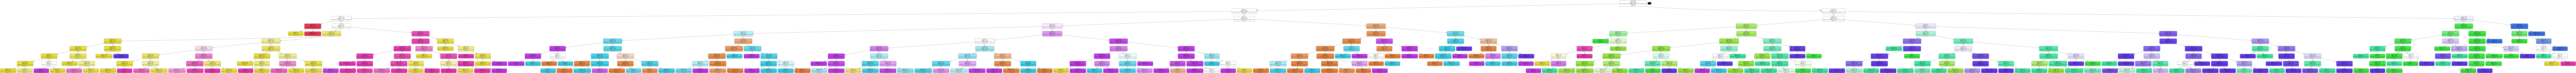

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydot
dot_data = StringIO()

dec_clf = DecisionTreeClassifier(max_depth = 9, random_state = 142, criterion = "entropy")

sensorless_drive_prediction(dec_clf, X_train, X_test, y_train, y_test, "features")

# Plot decision tree
export_graphviz(dec_clf, out_file = dot_data, rounded = True, feature_names = cols,
                precision = 2, special_characters = True, 
                class_names = ["s0", "s1", "s2", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s10"], filled = True)

graph, = pydot.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

### 4.4. KNN Classifier

In [25]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier(metric = 'minkowski', n_jobs = 1, n_neighbors = 5)

sensorless_drive_prediction(knn_clf, X_train, X_test, y_train, y_test, "None")

Algorithm: KNeighborsClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.53      0.65      0.59      1074
           1       0.62      0.69      0.65      1089
           2       0.56      0.64      0.59      1044
           3       0.64      0.71      0.67      1048
           4       0.49      0.47      0.48      1066
           5       0.54      0.54      0.54      1057
           6       0.99      0.92      0.95      1103
           7       0.60      0.51      0.55      1029
           8       0.70      0.57      0.63      1012
           9       0.71      0.60      0.65      1072
          10       1.00      1.00      1.00      1108

    accuracy                           0.67     11702
   macro avg       0.67      0.66      0.66     11702
weighted avg       0.67      0.67      0.67     11702

Accuracy Score: 0.6665527260297385
Area under curve: 0.9224983957679118


### 4.5. Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset. It uses averaging for regression and majority votes for classification to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same, but the samples are drawn with replacement.

In [26]:
from sklearn.ensemble import RandomForestClassifier
rfc_clf = RandomForestClassifier(n_estimators = 120, random_state = 142, max_depth = 9, criterion = 'entropy')

sensorless_drive_prediction(rfc_clf, X_train, X_test, y_train, y_test, "features")

Algorithm: RandomForestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99      1074
           1       0.95      0.98      0.96      1089
           2       0.99      1.00      0.99      1044
           3       0.99      0.99      0.99      1048
           4       0.99      0.96      0.97      1066
           5       0.98      0.98      0.98      1057
           6       1.00      1.00      1.00      1103
           7       0.96      0.98      0.97      1029
           8       0.98      0.99      0.98      1012
           9       0.98      0.94      0.96      1072
          10       1.00      1.00      1.00      1108

    accuracy                           0.98     11702
   macro avg       0.98      0.98      0.98     11702
weighted avg       0.98      0.98      0.98     11702

Accuracy Score: 0.9827379935053837
Area under curve: 0.9996884024807067


### 4.6. Gaussian Naive Bayes

In [27]:
from sklearn.naive_bayes import GaussianNB
gnb_clf = GaussianNB()

sensorless_drive_prediction(gnb_clf, X_train, X_test, y_train, y_test, "None")

Algorithm: GaussianNB
Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.94      0.75      1074
           1       0.51      0.02      0.04      1089
           2       0.62      0.95      0.75      1044
           3       0.47      0.92      0.62      1048
           4       0.20      0.00      0.01      1066
           5       0.55      0.02      0.04      1057
           6       1.00      1.00      1.00      1103
           7       0.79      0.47      0.59      1029
           8       0.44      0.92      0.59      1012
           9       0.68      0.88      0.76      1072
          10       1.00      1.00      1.00      1108

    accuracy                           0.65     11702
   macro avg       0.63      0.65      0.56     11702
weighted avg       0.63      0.65      0.56     11702

Accuracy Score: 0.6479234318919843
Area under curve: 0.9740952726227814


### 4.7. Support Vector Machine

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression, and outliers detection. It can solve linear and non-linear problems. The algorithm creates a line or a hyperplane which separates the data into classes. It is effective in high dimensional spaces. If the number of features much greater than the number of samples, then over-fitting may happen.

#### 4.7.1. Support Vector Machine (linear)

In [28]:
from sklearn.svm import SVC

# Support vector classifier using linear hyper plane
svc_l_clf = SVC(kernel = 'linear', probability = True, random_state = 142)

sensorless_drive_prediction(svc_l_clf, X_train, X_test, y_train, y_test, "coefficients")

Algorithm: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.96      0.95      1074
           1       0.88      0.91      0.90      1089
           2       0.97      0.97      0.97      1044
           3       0.97      0.99      0.98      1048
           4       0.88      0.79      0.83      1066
           5       0.88      0.88      0.88      1057
           6       1.00      1.00      1.00      1103
           7       0.83      0.92      0.87      1029
           8       0.92      0.89      0.91      1012
           9       0.91      0.88      0.89      1072
          10       1.00      1.00      1.00      1108

    accuracy                           0.93     11702
   macro avg       0.93      0.93      0.93     11702
weighted avg       0.93      0.93      0.93     11702

Accuracy Score: 0.9263373782259443
Area under curve: 0.9952460736129622


#### 4.7.2. Support Vector Machine (rbf)

In [29]:
# Support vector classifier using non-linear hyper plane ("rbf")
svc_r_clf = SVC(kernel = 'rbf', probability = True, random_state = 142)

sensorless_drive_prediction(svc_r_clf, X_train, X_test, y_train, y_test, "None")

Algorithm: SVC
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98      1074
           1       0.86      0.93      0.89      1089
           2       0.98      0.97      0.98      1044
           3       0.98      0.98      0.98      1048
           4       0.96      0.92      0.94      1066
           5       0.92      0.95      0.93      1057
           6       1.00      0.99      1.00      1103
           7       0.92      0.96      0.94      1029
           8       0.94      0.93      0.94      1012
           9       0.92      0.86      0.89      1072
          10       1.00      1.00      1.00      1108

    accuracy                           0.95     11702
   macro avg       0.95      0.95      0.95     11702
weighted avg       0.95      0.95      0.95     11702

Accuracy Score: 0.9516321996239959
Area under curve: 0.9983376158345929


### 4.8. LightGBM Classifier

LightGBM stands for light gradient-boosting machine is a gradient-boosting framework for machine learning. It is based on decision trees to increase the efficiency of the model and used for ranking, classification and other machine learning tasks. It uses two novel techniques - Gradient-based One Side Sampling (GOSS), and Exclusive Feature Bundling (EFB).

In [30]:
from lightgbm import LGBMClassifier
lgb_clf = LGBMClassifier(learning_rate = 0.3, max_depth = 5, min_child_weight = 0.001,
                         n_estimators = 10, n_jobs = 1, num_leaves = 100, objective = 'multiclass', 
                         random_state = 142, silent = True) 

sensorless_drive_prediction(lgb_clf, X_train, X_test, y_train, y_test, "features")

Algorithm: LGBMClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1074
           1       0.99      1.00      0.99      1089
           2       0.98      0.99      0.99      1044
           3       1.00      1.00      1.00      1048
           4       0.99      0.98      0.99      1066
           5       0.98      0.98      0.98      1057
           6       1.00      1.00      1.00      1103
           7       0.99      1.00      0.99      1029
           8       0.99      0.98      0.98      1012
           9       1.00      1.00      1.00      1072
          10       1.00      1.00      1.00      1108

    accuracy                           0.99     11702
   macro avg       0.99      0.99      0.99     11702
weighted avg       0.99      0.99      0.99     11702

Accuracy Score: 0.9921380960519569
Area under curve: 0.9999057398020565


### 4.9. XGBoost Classifier

XGBoost (eXtreme Gradient Boosting) provides a regularizing gradient boosting framework. XGBoost provides a parallel tree boosting - GBDT and GBM, that solves many machine learning problems in a fast and accurate way. While XGBoost often achieves higher accuracy than a single decision treee, it sacrifies the intrinsic interpretability of decision trees.

In [31]:
from xgboost import XGBClassifier

xgb_clf = XGBClassifier(n_estimators = 100, max_depth = 7, learning_rate = 0.9, objective = 'multi:softmax',
                        booster = 'gbtree', n_jobs = 1, min_child_weight = 1.0, num_class = 11)

sensorless_drive_prediction(xgb_clf, X_train, X_test, y_train, y_test, "features")

Algorithm: XGBClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1074
           1       1.00      0.99      0.99      1089
           2       1.00      1.00      1.00      1044
           3       1.00      1.00      1.00      1048
           4       1.00      0.99      1.00      1066
           5       0.99      1.00      1.00      1057
           6       1.00      1.00      1.00      1103
           7       1.00      1.00      1.00      1029
           8       1.00      1.00      1.00      1012
           9       0.99      1.00      1.00      1072
          10       1.00      1.00      1.00      1108

    accuracy                           1.00     11702
   macro avg       1.00      1.00      1.00     11702
weighted avg       1.00      1.00      1.00     11702

Accuracy Score: 0.9976927021022047
Area under curve: 0.9999975329721305


### 4.10. AdaBoost Classifier

AdaBoost (Adaptive Boosting) is a meta-estimator that begins by fitting a classifier (the most common estimator used is decision tree) on the original dataset and then fits additional copies of the classifier on the same dataset with weights of incorrectly classified instances are adjusted.

In [32]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(random_state = 142)

sensorless_drive_prediction(ada_clf, X_train, X_test, y_train, y_test, "features")

Algorithm: AdaBoostClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1074
           1       0.00      0.00      0.00      1089
           2       0.00      0.00      0.00      1044
           3       0.02      0.01      0.01      1048
           4       0.00      0.00      0.00      1066
           5       0.00      0.00      0.00      1057
           6       1.00      0.40      0.57      1103
           7       0.00      0.00      0.00      1029
           8       0.14      0.99      0.24      1012
           9       0.50      1.00      0.66      1072
          10       1.00      1.00      1.00      1108

    accuracy                           0.31     11702
   macro avg       0.24      0.31      0.23     11702
weighted avg       0.25      0.31      0.23     11702

Accuracy Score: 0.31063066142539736
Area under curve: 0.6976046024925223


### 4.11. OneVsRestClassifier

One-vs-the-rest (OvR) multiclass strategy. It is also known as one-vs-all. For each classifier, the class is fitted against all the other classes. One benefit of using this approach is its interpretability. OneVsRestClassifier can be used for multilabel classification. For multiclass classification, this is a fairly used common strategy.

In [33]:
from sklearn.multiclass import OneVsRestClassifier

orc_clf = OneVsRestClassifier(ada_clf)

sensorless_drive_prediction(orc_clf, X_train, X_test, y_train, y_test, "None")

Algorithm: OneVsRestClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1074
           1       0.98      0.97      0.97      1089
           2       1.00      1.00      1.00      1044
           3       1.00      1.00      1.00      1048
           4       0.99      0.98      0.99      1066
           5       0.96      0.98      0.97      1057
           6       1.00      1.00      1.00      1103
           7       0.98      0.99      0.99      1029
           8       0.98      0.96      0.97      1012
           9       0.97      0.98      0.98      1072
          10       1.00      1.00      1.00      1108

    accuracy                           0.99     11702
   macro avg       0.99      0.99      0.99     11702
weighted avg       0.99      0.99      0.99     11702

Accuracy Score: 0.9858998461801401
Area under curve: 0.9954536391758402


While AdaBoostClassifier classification itself performed poorly on the dataset with an accuracy score 0.311, the same classifier when used with OneVsRestClassifier classification, it generated an accuracy score 0.986 - a significant improvement.

### 4.12. GradientBoosting Classifier

Gradient Boosting is a machine learning technique used in regression and classification tasks, among others. Gradient Boosting combines weak learners such as decision trees into a single strong learner in an iterative fashion. It usually performs better than Random Forest.

In [34]:
from sklearn.ensemble import GradientBoostingClassifier

gbc_clf = GradientBoostingClassifier(random_state = 142)

sensorless_drive_prediction(gbc_clf, X_train, X_test, y_train, y_test, "features")

Algorithm: GradientBoostingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      1.00      1074
           1       0.99      0.99      0.99      1089
           2       1.00      1.00      1.00      1044
           3       1.00      1.00      1.00      1048
           4       1.00      0.99      1.00      1066
           5       0.99      1.00      0.99      1057
           6       1.00      1.00      1.00      1103
           7       1.00      1.00      1.00      1029
           8       0.99      1.00      0.99      1012
           9       0.99      0.99      0.99      1072
          10       1.00      1.00      1.00      1108

    accuracy                           1.00     11702
   macro avg       1.00      1.00      1.00     11702
weighted avg       1.00      1.00      1.00     11702

Accuracy Score: 0.9962399589813707
Area under curve: 0.9999643816973443


### 4.13. Linear Discriminant Analysis

In [35]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda_clf = LinearDiscriminantAnalysis()

sensorless_drive_prediction(lda_clf, X_train, X_test, y_train, y_test, "None")

Algorithm: LinearDiscriminantAnalysis
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83      1074
           1       0.80      0.77      0.79      1089
           2       0.86      0.91      0.88      1044
           3       0.92      0.90      0.91      1048
           4       0.77      0.71      0.74      1066
           5       0.66      0.66      0.66      1057
           6       1.00      1.00      1.00      1103
           7       0.81      0.85      0.83      1029
           8       0.80      0.76      0.78      1012
           9       0.78      0.81      0.79      1072
          10       1.00      1.00      1.00      1108

    accuracy                           0.84     11702
   macro avg       0.84      0.84      0.84     11702
weighted avg       0.84      0.84      0.84     11702

Accuracy Score: 0.8389164245428132
Area under curve: 0.986539107733872


### 4.14. Quadratic Discriminant Analysis

In [36]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda_clf = QuadraticDiscriminantAnalysis()

sensorless_drive_prediction(qda_clf, X_train, X_test, y_train, y_test, "None")

Algorithm: QuadraticDiscriminantAnalysis
Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.96      0.92      1074
           1       0.85      0.08      0.14      1089
           2       0.86      0.98      0.91      1044
           3       0.84      1.00      0.91      1048
           4       0.92      0.37      0.52      1066
           5       0.93      0.75      0.83      1057
           6       1.00      0.99      1.00      1103
           7       0.74      0.94      0.83      1029
           8       0.82      0.96      0.88      1012
           9       0.53      0.99      0.69      1072
          10       1.00      1.00      1.00      1108

    accuracy                           0.82     11702
   macro avg       0.85      0.82      0.79     11702
weighted avg       0.85      0.82      0.79     11702

Accuracy Score: 0.8193471201504017
Area under curve: 0.9929656620620125


### 4.15. Multi-layer Perceptron Classifier

A Mutli-layer perceptron (MLP) is a fully connected class of feedforward artificial neural network. An MLP consists of at least three layers of nodes - an input layer, a hidden layer, and an output layer. Hidden layer and output layer use non-linear activation function.

In [37]:
from sklearn.neural_network import MLPClassifier

mlp_clf = MLPClassifier(alpha = 1.0, max_iter = 1000, batch_size = 32, random_state = 142)

sensorless_drive_prediction(mlp_clf, X_train, X_test, y_train, y_test, "None")

Algorithm: MLPClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.93      0.76      1074
           1       0.79      0.90      0.84      1089
           2       0.82      0.88      0.85      1044
           3       0.87      0.80      0.84      1048
           4       0.75      0.64      0.69      1066
           5       0.85      0.21      0.34      1057
           6       0.98      1.00      0.99      1103
           7       0.79      0.89      0.84      1029
           8       0.69      0.92      0.79      1012
           9       0.89      0.75      0.82      1072
          10       1.00      1.00      1.00      1108

    accuracy                           0.81     11702
   macro avg       0.83      0.81      0.80     11702
weighted avg       0.83      0.81      0.80     11702

Accuracy Score: 0.8127670483678003
Area under curve: 0.9788458405450936


### 4.16. Bagging Classifier

A Bagging classifier is an ensemble meta-estimator that fits base classifiers each on random subsets of the original dataset and then aggregate their individual predictions (either by majority voting or by averaging) to form a final prediction. Bagging can be used as a way to reduce the variance of weak estimator such as decision tree. Random subsets of the dataset are drawn from the original dataset with replacement.

In [38]:
from sklearn.ensemble import BaggingClassifier

bgc_clf = BaggingClassifier(random_state = 142)

sensorless_drive_prediction(bgc_clf, X_train, X_test, y_train, y_test, "None")

Algorithm: BaggingClassifier
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1074
           1       0.99      0.99      0.99      1089
           2       0.99      0.99      0.99      1044
           3       0.99      1.00      1.00      1048
           4       0.98      0.98      0.98      1066
           5       0.98      0.99      0.98      1057
           6       1.00      1.00      1.00      1103
           7       0.99      0.98      0.99      1029
           8       0.99      0.98      0.99      1012
           9       0.99      0.99      0.99      1072
          10       1.00      1.00      1.00      1108

    accuracy                           0.99     11702
   macro avg       0.99      0.99      0.99     11702
weighted avg       0.99      0.99      0.99     11702

Accuracy Score: 0.9906853529311229
Area under curve: 0.9992290499710964


## 5. Model Performances over the Test Dataset

In [39]:
# Putting all the model names, model classes and the used columns in a dictionary
models = {'Logistic (Baseline)': [log_clf, cols],
          'Logistic (RFE)': [log_clf_rfe, cols_rfe],
          'Decision Tree': [dec_clf, cols],
          'KNN Classifier': [knn_clf, cols],
          'Random Forest': [rfc_clf, cols],
          'Naive Bayes': [gnb_clf, cols],
          'SVM (linear)': [svc_l_clf, cols],
          'SVM (rbf)': [svc_r_clf, cols],
          'LGBM Classifier': [lgb_clf, cols],
          'XGBoost Classifier': [xgb_clf, cols],
          'AdaBoost': [ada_clf, cols],
          'OneVsRestClassifier': [orc_clf, cols],
          'GradientBoost': [gbc_clf, cols],
          'LDA': [lda_clf, cols],
          'QDA': [qda_clf, cols],
          'MLP Classifier': [mlp_clf, cols],
          'Bagging Classifier': [bgc_clf, cols]
         }

### 5.1. Model Performance Metrics

In [40]:
# Gives model report in dataframe
def model_report(model, train_X, test_X, train_y, test_y, name):
    model = model.fit(train_X, train_y)
    pred_y = model.predict(test_X)
    proba_val = model.predict_proba(test_X)
    accuracy = accuracy_score(test_y, pred_y)
    recall = recall_score(test_y, pred_y, average = 'micro')
    precision = precision_score(test_y, pred_y, average = 'micro')
    f1 = f1_score(test_y, pred_y,average = 'micro')
    roc_auc = roc_auc_score(test_y, proba_val, average = 'micro', multi_class = 'ovr')
    ckappa = cohen_kappa_score(test_y, pred_y)
    
    df = pd.DataFrame({"Model"          :[name],
                       "Accuracy"       :[accuracy],
                       "Recall"         :[recall],
                       "Precision"      :[precision],
                       "f1-score"       :[f1],
                       "Roc_auc"        :[roc_auc],
                       "Kappa_metric"   :[ckappa]
                      })
    return df
    

In [41]:
# Outputs for all models over the training dataset
model_performances_train = pd.DataFrame()
for name in models:
    model_performances_train = model_performances_train.append(model_report(models[name][0],
                                                               X_train[models[name][1]],
                                                               X_test[models[name][1]],
                                                               y_train, y_test, name), ignore_index = True)

table_train = ff.create_table(np.round(model_performances_train, 4))
py.iplot(table_train)

From the tabular representation of the metrics of the classifiers used in this analysis, it is clear that XGBoost classifier performed the best for test data followed by Gradient Boost Classifier. On the otherhand, AdaBoost classifier performed poorly.

### 5.2. Compare Model Metrics

In [42]:
def output_tracer(df, metric, color):
    tracer = go.Bar(y = df["Model"],
                    x = df[metric],
                    orientation = "h",
                    name = metric,
                    marker = dict(line = dict(width = 0.9), color = color)
                   )
    return tracer

def model_metrics_plot(df, title):
    layout = go.Layout(dict(title = title,
                            plot_bgcolor = "rgb(243, 243, 243)",
                            paper_bgcolor = "rgb(243, 243, 243)",
                            xaxis = dict(gridcolor = "rgb(255, 255, 255)",
                                         title = "Metric",
                                         zerolinewidth = 1,
                                         ticklen = 5, gridwidth = 2),
                            yaxis = dict(gridcolor = "rgb(255, 255, 255)",
                                         zerolinewidth = 1,
                                         ticklen = 5, gridwidth = 2),
                            margin = dict(l = 250),
                            height = 780
                           ))
    
    trace1 = output_tracer(df, "Accuracy", "green")
    trace2 = output_tracer(df, "Recall", "red")
    trace3 = output_tracer(df, "Precision", "cyan")
    trace4 = output_tracer(df, "f1-score", "skyblue")
    trace5 = output_tracer(df, "Roc_auc", "magenta")
    trace6 = output_tracer(df, "Kappa_metric", "violet")
    
    data = [trace1, trace2, trace3, trace4, trace5, trace6]
    fig = go.Figure(data = data, layout = layout)
    py.iplot(fig)   

In [43]:
model_metrics_plot(df = model_performances_train, title = "Model Performances over the Test Dataset")

### 5.3. Confusion Matrices for Models

In [44]:
def conf_mat_plot(modeldict, df_train, df_test, target_train, target_test, figcolnumber):
    fig = plt.figure(figsize = (11*figcolnumber, 11*ceil(len(modeldict)/figcolnumber)))
    fig.set_facecolor("#F3F3F3")
    for name, figpos in itertools.zip_longest(modeldict, range(len(modeldict))):
        plt.subplot(ceil(len(modeldict)/figcolnumber), figcolnumber, figpos + 1)
        model = modeldict[name][0].fit(df_train[modeldict[name][1]], target_train)
        predictions = model.predict(df_test[modeldict[name][1]])
        conf_matrix = confusion_matrix(target_test, predictions)
        sns.heatmap(conf_matrix, annot = True, fmt = "d", square = True,
                    xticklabels = ["s0", "s1", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s10"],
                    yticklabels = ["s0", "s1", "s3", "s4", "s5", "s6", "s7", "s8", "s9", "s10"],
                    linewidth = 2, linecolor = "w", cmap = "Set1")
        plt.title(name, color = "b")
        plt.subplots_adjust(wspace = 0.3, hspace = 0.3)

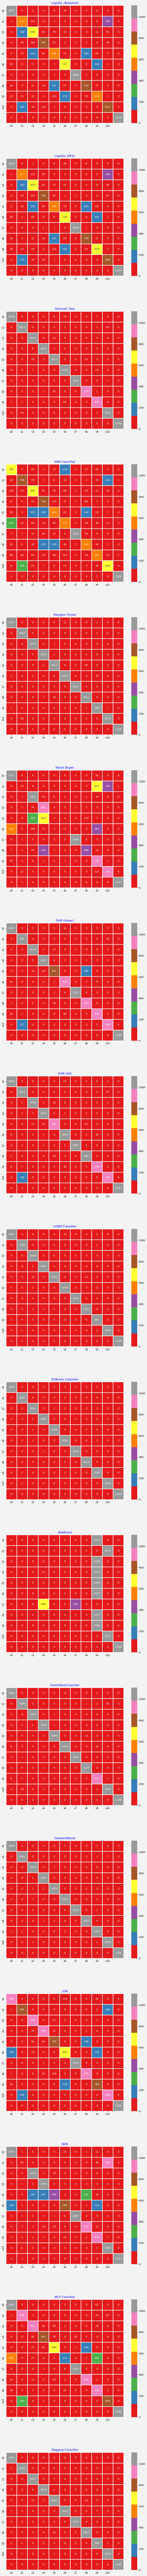

In [45]:
conf_mat_plot(modeldict = models, df_train = X_train, df_test = X_test,
            target_train = y_train, target_test = y_test, figcolnumber = 1)

Heat map representation of the Confusion Matrix shows the deviation of predicted values from the top-left to bottom-right diagonal for test data. The values along the diagonal represents the matching of true values with the predicted values. For the models which performed well, almost all values are recorded along the diagonal.

# Conclusion

In this analysis, we found that XGBoost classifier and GradientBoost classifier both of which are ensemble methods performed better than the other methods we used. Next, AdaBoost classifier itself performed poorly among all the classifiers even though it is an ensemble method. But when AdaBoost classifier was used with OneVsRestClassifier classification, the performance improved significantly.

In this analysis we did not use K-Fold cross-validator and hyper-parameter optimizers GridSearchCV or RandomizedSearchCV to determine parameters which will optimize accuracy, confusion matrix etc.